<a href="https://colab.research.google.com/github/KangJaeHun/python-class/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# 얼굴 인식 프로그램

import matplotlib.pyplot as plt  # 그림과 관련된 모듈 
import matplotlib.image as mpimg # 사진과 관련된 모듈 

# 웹상에서 그림을 나타내는 명령 생략 가능
%matplotlib inline 

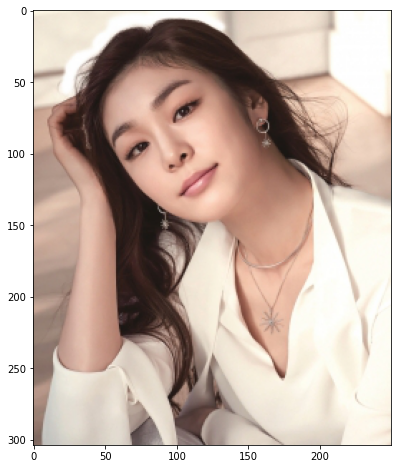

In [62]:
# 사진 읽어오기
img = mpimg.imread('yuna.jpg')
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()  # 로컬에서는 생략 가능


In [63]:
import requests # 인터넷 연결 데이터 전송



client_id = "olN3wSIOaWupF80Dgb0Y"
client_secret = "Ia0qfErN4e"

url = "https://openapi.naver.com/v1/vision/face" # // 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # // 유명인 연예인 닮은얼굴인식
files = {'image': open('yuna.jpg', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

detect = json.loads(response.text)

In [64]:
# import json # json 형식을 분석하는 모듈

# parsed = json.loads(response.text)
# print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))


In [65]:
detect.keys()

dict_keys(['info', 'faces'])

In [66]:
detect['faces'][0]

{'age': {'confidence': 0.713652, 'value': '22~26'},
 'emotion': {'confidence': 0.999992, 'value': 'neutral'},
 'gender': {'confidence': 0.999852, 'value': 'female'},
 'landmark': None,
 'pose': {'confidence': 0.89321, 'value': 'part_face'},
 'roi': {'height': 109, 'width': 109, 'x': 50, 'y': 42}}

In [67]:
detect['faces'][0]['roi']

{'height': 109, 'width': 109, 'x': 50, 'y': 42}

In [68]:
detect['faces'][0]['gender']

{'confidence': 0.999852, 'value': 'female'}

In [69]:
detect['faces'][0]['age']

{'confidence': 0.713652, 'value': '22~26'}

In [70]:
detect['faces'][0]['emotion']

{'confidence': 0.999992, 'value': 'neutral'}

In [71]:
x,y,w,h = detect['faces'][0]['roi'].values()
gender, gen_conf = detect['faces'][0]['gender'].values()
emotion, emotion_conf = detect['faces'][0]['emotion'].values()
age, age_conf = detect['faces'][0]['age'].values()

In [72]:
annotation = gender + ':' + str(gen_conf) + \
  '\n' + emotion + ':' + str(emotion_conf) + \
  '\n' + age + ":" + str(age_conf)
print(annotation)

female:0.999852
neutral:0.999992
22~26:0.713652


Text(10, 400, 'female:0.999852\nneutral:0.999992\n22~26:0.713652')

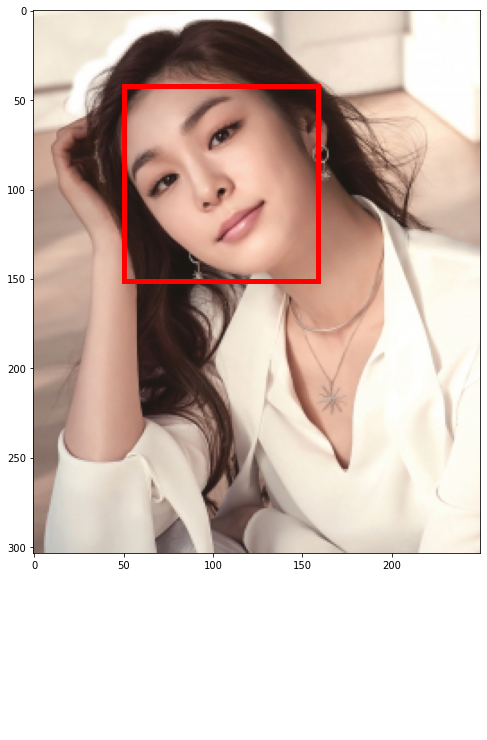

In [73]:
import matplotlib.patches as patches

img = mpimg.imread('yuna.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
re_face = patches.Rectangle((x,y),w,h,
                             linewidth = 5,
                             edgecolor = 'r',
                             facecolor = 'none')
ax.add_patch(re_face)
plt.text(10,400, annotation, wrap=True, fontsize=17, color='white')